In [2]:
import numpy as np

# Define the data points
data_points = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])

# Define the initial cluster centers
cluster_centers = np.array([[2, 10], [5, 8], [1, 2]])


In [3]:

# Define the distance function (Euclidean distance)
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Define the k-means algorithm
def k_means(data, centers, distance_func):
    num_clusters = centers.shape[0]
    num_points = data.shape[0]
    cluster_labels = np.zeros(num_points)
    first_centers = np.zeros(data.shape[1])
    iter_counter = 0
    
    while True:
        # Assign points to the nearest cluster
        for i in range(num_points):
            distances = np.zeros(num_clusters)
            for j in range(num_clusters):
                distances[j] = distance_func(data[i], centers[j])
            cluster_labels[i] = np.argmin(distances)
        
        # Update cluster centers
        new_centers = np.zeros_like(centers)
        for i in range(num_clusters):
            cluster_points = data[cluster_labels == i]
            new_centers[i] = np.mean(cluster_points, axis=0)

        iter_counter += 1

        if iter_counter == 1:
            first_centers = new_centers
 
        # Check for convergence
        if np.array_equal(new_centers, centers):
            break
        
        centers = new_centers

    
    return first_centers, centers, cluster_labels, iter_counter

# Perform the final round of k-means
first_centers, final_centers, final_labels, iter_counter = k_means(data_points, cluster_centers, euclidean_distance)

# Display the Iteration Number of Algorithm
print("Iteration Number of Algorithm:")
print(iter_counter)

# Display the cluster centers after the first round
print("\nCluster Centers (After the First Round):")
print(final_centers)

# Display the final clusters
print("\nFinal Clusters:")
for i in range(final_centers.shape[0]):
    cluster_points = data_points[final_labels == i]
    print(f"Cluster {i+1}:")
    print(cluster_points)
    print("--------")

Iteration Number of Algorithm:
4

Cluster Centers (After the First Round):
[[3 9]
 [7 4]
 [1 3]]

Final Clusters:
Cluster 1:
[[ 2 10]
 [ 5  8]
 [ 4  9]]
--------
Cluster 2:
[[8 4]
 [7 5]
 [6 4]]
--------
Cluster 3:
[[2 5]
 [1 2]]
--------


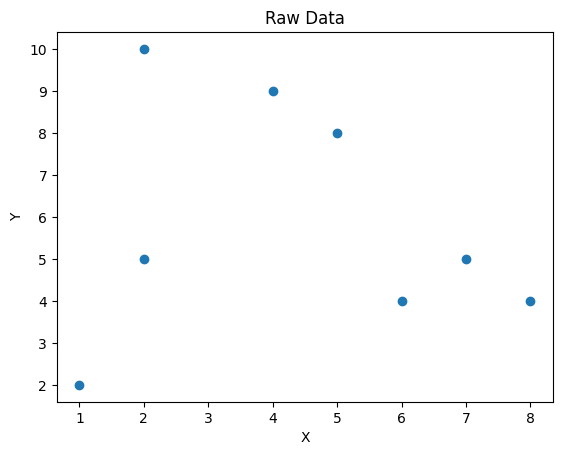

In [4]:
import matplotlib.pyplot as plt
# Plotting the data points and clusters
plt.scatter(data_points[:, 0], data_points[:, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Raw Data')
plt.show()

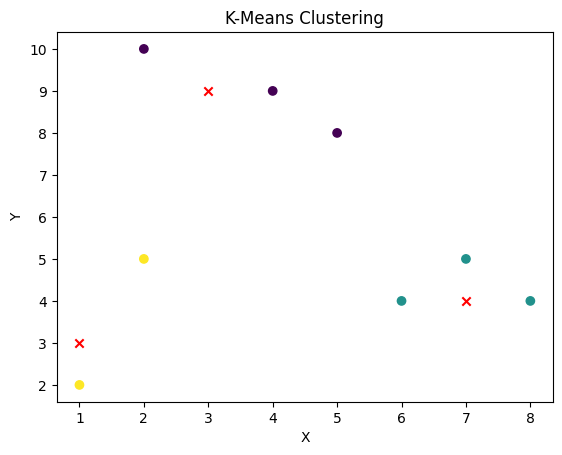

In [5]:
import matplotlib.pyplot as plt
# Plotting the data points and clusters
plt.scatter(data_points[:, 0], data_points[:, 1], c=final_labels)
plt.scatter(final_centers[:, 0], final_centers[:, 1], marker='x', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-Means Clustering')
plt.show()